In [29]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [33]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=04803eedcaa8648155036b329dffb30f


In [34]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | sakakah
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | mareeba
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | kijang
Processing Record 9 of Set 1 | sept-iles
Processing Record 10 of Set 1 | husavik
Processing Record 11 of Set 1 | rio de janeiro
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | chabua
Processing Record 16 of Set 1 | tabarqah
City not found. Skipping...
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | valdivia
Processing Record 21 of Set 1 | avarua
Processing Record 2

Processing Record 39 of Set 4 | ballina
Processing Record 40 of Set 4 | los llanos de aridane
Processing Record 41 of Set 4 | gornyy
Processing Record 42 of Set 4 | annau
Processing Record 43 of Set 4 | lebu
Processing Record 44 of Set 4 | iralaya
Processing Record 45 of Set 4 | beloha
Processing Record 46 of Set 4 | nikolskoye
Processing Record 47 of Set 4 | hihifo
City not found. Skipping...
Processing Record 48 of Set 4 | pallapatti
Processing Record 49 of Set 4 | jibuti
Processing Record 50 of Set 4 | dali
Processing Record 1 of Set 5 | bedesa
Processing Record 2 of Set 5 | guerrero negro
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | mitsamiouli
Processing Record 5 of Set 5 | darnah
Processing Record 6 of Set 5 | siderno
Processing Record 7 of Set 5 | tazovskiy
Processing Record 8 of Set 5 | tevaitoa
Processing Record 9 of Set 5 | san patricio
Processing Record 10 of Set 5 | ayer itam
City not found. Skipping...
Processing Record 11 of Set 5 | hobart
Pro

Processing Record 25 of Set 8 | akdepe
Processing Record 26 of Set 8 | cam ranh
Processing Record 27 of Set 8 | bahia honda
Processing Record 28 of Set 8 | sobolevo
Processing Record 29 of Set 8 | atasu
Processing Record 30 of Set 8 | onverwacht
Processing Record 31 of Set 8 | kuche
City not found. Skipping...
Processing Record 32 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 33 of Set 8 | powell river
Processing Record 34 of Set 8 | tanta
Processing Record 35 of Set 8 | ekhabi
Processing Record 36 of Set 8 | cabo san lucas
Processing Record 37 of Set 8 | saint-francois
Processing Record 38 of Set 8 | semirom
Processing Record 39 of Set 8 | ierapetra
Processing Record 40 of Set 8 | kahului
Processing Record 41 of Set 8 | nevel
Processing Record 42 of Set 8 | san rafael del sur
Processing Record 43 of Set 8 | inuvik
Processing Record 44 of Set 8 | hibbing
Processing Record 45 of Set 8 | thakurgaon
Processing Record 46 of Set 8 | yuanping
Processing Record 47 of S

Processing Record 12 of Set 12 | kisangani
Processing Record 13 of Set 12 | tariba
Processing Record 14 of Set 12 | mamou
Processing Record 15 of Set 12 | englewood
Processing Record 16 of Set 12 | aripuana
Processing Record 17 of Set 12 | acapulco
Processing Record 18 of Set 12 | qax
Processing Record 19 of Set 12 | comarapa
Processing Record 20 of Set 12 | hare bay
Processing Record 21 of Set 12 | novyy rogachik
Processing Record 22 of Set 12 | viedma
Processing Record 23 of Set 12 | djougou
Processing Record 24 of Set 12 | tommot
Processing Record 25 of Set 12 | severnoye
Processing Record 26 of Set 12 | la libertad
Processing Record 27 of Set 12 | port said
Processing Record 28 of Set 12 | iracoubo
Processing Record 29 of Set 12 | puerto madryn
Processing Record 30 of Set 12 | kitimat
Processing Record 31 of Set 12 | garissa
Processing Record 32 of Set 12 | phan rang
City not found. Skipping...
Processing Record 33 of Set 12 | sorland
Processing Record 34 of Set 12 | muli
Processin

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.02,74,15,11.99,PF,2023-03-14 15:44:12
1,Port Alfred,-33.5906,26.8910,73.18,87,28,1.01,ZA,2023-03-14 15:44:12
2,Sakakah,29.9697,40.2064,83.77,19,0,11.16,SA,2023-03-14 15:44:13
3,Mataura,-46.1927,168.8643,54.48,95,100,1.88,NZ,2023-03-14 15:44:13
4,Mareeba,-17.0000,145.4333,73.44,95,31,1.77,AU,2023-03-14 15:44:14
...,...,...,...,...,...,...,...,...,...
556,Madimba,-10.4000,40.3333,85.32,65,20,11.50,TZ,2023-03-14 15:48:15
557,Jacala,21.0167,-99.1833,66.67,62,92,3.13,MX,2023-03-14 15:48:16
558,Fukue,32.6881,128.8419,59.05,73,3,17.31,JP,2023-03-14 15:48:16
559,Demirci,39.0461,28.6589,45.66,63,94,2.71,TR,2023-03-14 15:48:17


In [40]:
New_Order_Column=["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [41]:
city_data_df=city_data_df[New_Order_Column]

In [38]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2023-03-14 15:44:12,-23.1203,-134.9692,79.02,74,15,11.99
1,Port Alfred,ZA,2023-03-14 15:44:12,-33.5906,26.8910,73.18,87,28,1.01
2,Sakakah,SA,2023-03-14 15:44:13,29.9697,40.2064,83.77,19,0,11.16
3,Mataura,NZ,2023-03-14 15:44:13,-46.1927,168.8643,54.48,95,100,1.88
4,Mareeba,AU,2023-03-14 15:44:14,-17.0000,145.4333,73.44,95,31,1.77
...,...,...,...,...,...,...,...,...,...
556,Madimba,TZ,2023-03-14 15:48:15,-10.4000,40.3333,85.32,65,20,11.50
557,Jacala,MX,2023-03-14 15:48:16,21.0167,-99.1833,66.67,62,92,3.13
558,Fukue,JP,2023-03-14 15:48:16,32.6881,128.8419,59.05,73,3,17.31
559,Demirci,TR,2023-03-14 15:48:17,39.0461,28.6589,45.66,63,94,2.71


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [46]:
import time

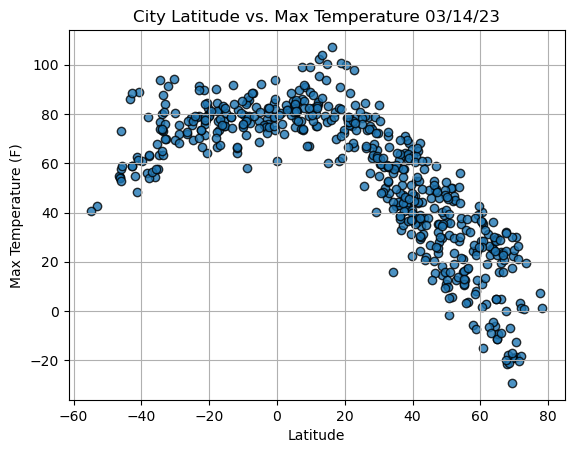

In [47]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

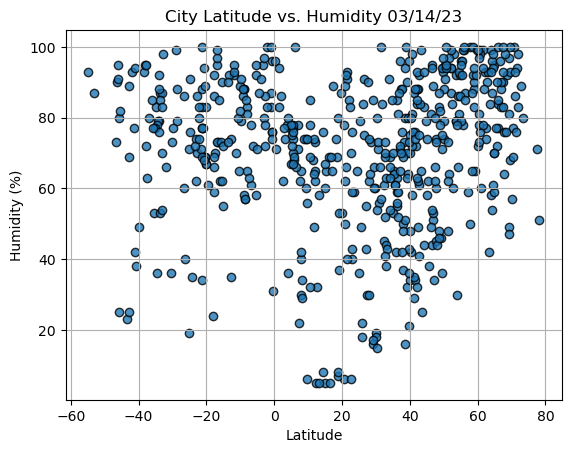

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

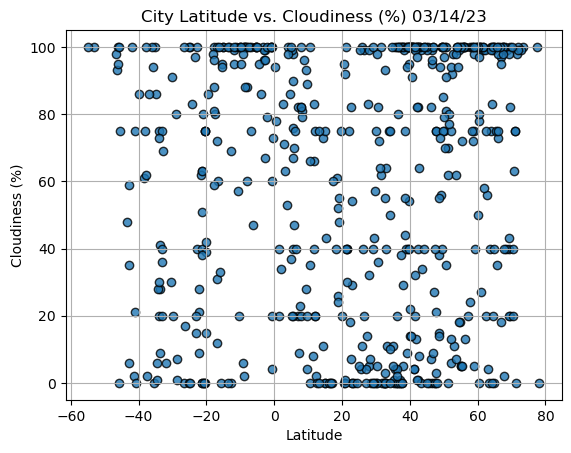

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

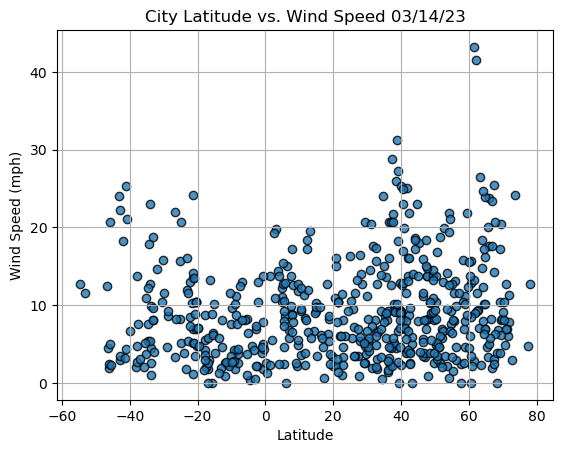

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [52]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
index13 = city_data_df.loc[13]
index13

City                       Chabua
Country                        IN
Date          2023-03-14 15:44:18
Lat                       27.4825
Lng                       95.1736
Max Temp                    75.22
Humidity                       30
Cloudiness                     14
Wind Speed                   3.47
Name: 13, dtype: object

In [54]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Sakakah,SA,2023-03-14 15:44:13,29.9697,40.2064,83.77,19,0,11.16
6,Kijang,KR,2023-03-14 15:44:15,35.2442,129.2139,42.53,65,0,8.63
7,Sept-Iles,CA,2023-03-14 15:44:15,50.2001,-66.3821,36.12,74,75,10.36
8,Husavik,IS,2023-03-14 15:44:16,66.0449,-17.3389,19.51,84,100,17.65
10,Kapaa,US,2023-03-14 15:44:17,22.0752,-159.3190,75.18,85,75,5.99
...,...,...,...,...,...,...,...,...,...
553,Nizwa,OM,2023-03-14 15:48:13,22.9333,57.5333,76.23,43,54,4.59
557,Jacala,MX,2023-03-14 15:48:16,21.0167,-99.1833,66.67,62,92,3.13
558,Fukue,JP,2023-03-14 15:48:16,32.6881,128.8419,59.05,73,3,17.31
559,Demirci,TR,2023-03-14 15:48:17,39.0461,28.6589,45.66,63,94,2.71


In [55]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

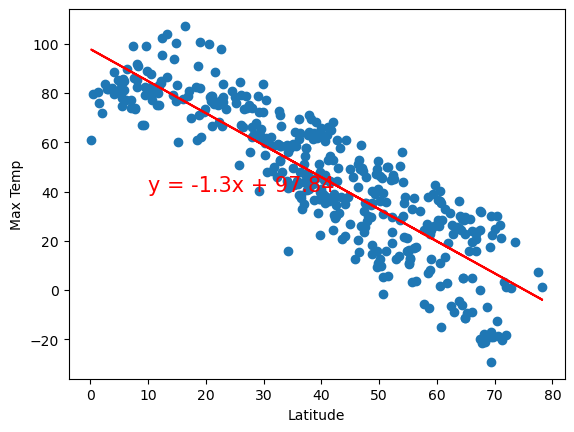

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

In [57]:
linregress(x_values, y_values)

LinregressResult(slope=-1.3008652414169914, intercept=97.83836390444233, rvalue=-0.8739960799608841, pvalue=9.44883810032483e-128, stderr=0.036118275460736336, intercept_stderr=1.5936078650639596)

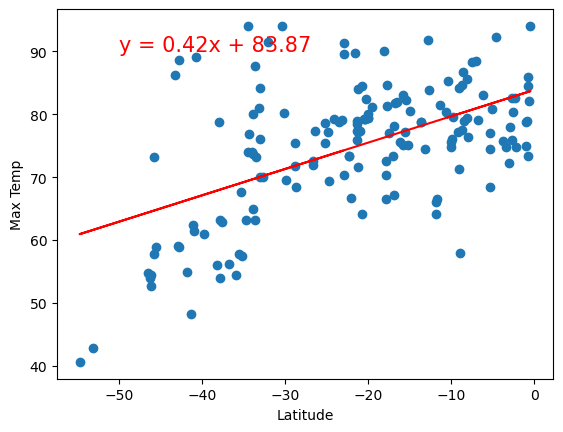

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [59]:
linregress(x_values, y_values)

LinregressResult(slope=0.41863516952366686, intercept=83.8723405361327, rvalue=0.5393146493692784, pvalue=2.6512846588128283e-13, stderr=0.05233558664423942, intercept_stderr=1.3319483694925527)

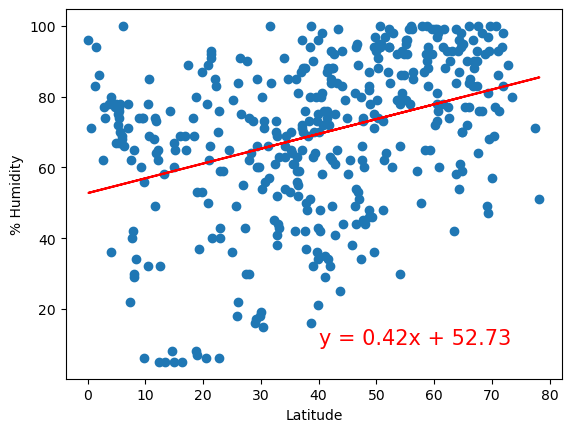

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemispher for % Humidity', '% Humidity',(40,10))

In [61]:
linregress(x_values, y_values)

LinregressResult(slope=0.41842836186173055, intercept=52.72704931857962, rvalue=0.36251647685784943, pvalue=5.827295177512639e-14, stderr=0.05371882945758895, intercept_stderr=2.370178200194114)

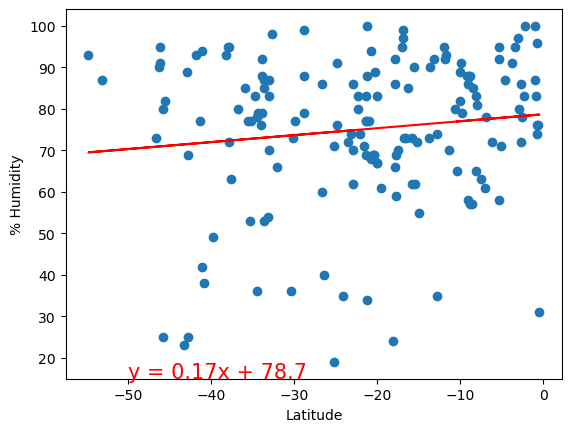

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [63]:
linregress(x_values, y_values)

LinregressResult(slope=0.16759805047741488, intercept=78.7001256760155, rvalue=0.12582784969192523, pvalue=0.11517783577671384, stderr=0.10579481063366393, intercept_stderr=2.6924934745102806)

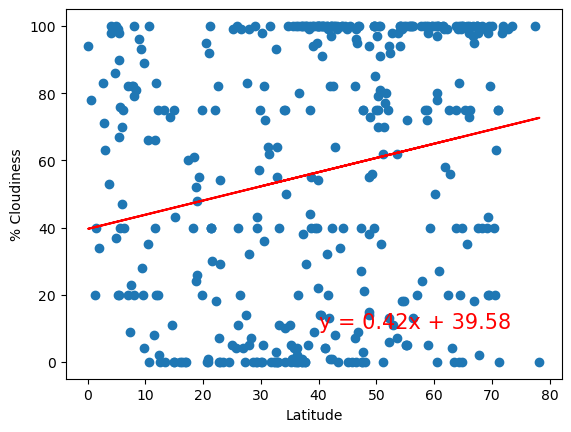

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemispher for % Cloudiness', '% Cloudiness',(40,10))

In [65]:
linregress(x_values, y_values)

LinregressResult(slope=0.4227844607424849, intercept=39.57927426540144, rvalue=0.20960896406544813, pvalue=2.2152110442884907e-05, stderr=0.09848735636045948, intercept_stderr=4.345451816380424)

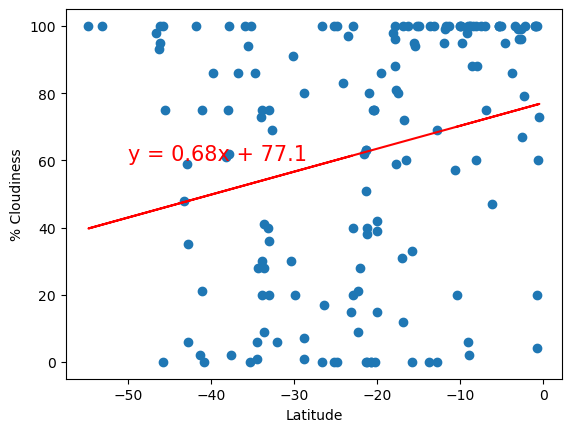

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [67]:
linregress(x_values, y_values)

LinregressResult(slope=0.6821845031428232, intercept=77.09980576098008, rvalue=0.2440499135964624, pvalue=0.002000451774866259, stderr=0.2170332907026664, intercept_stderr=5.52352913596008)

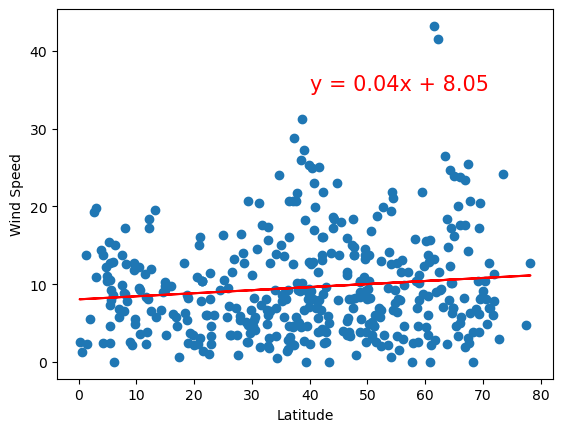

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

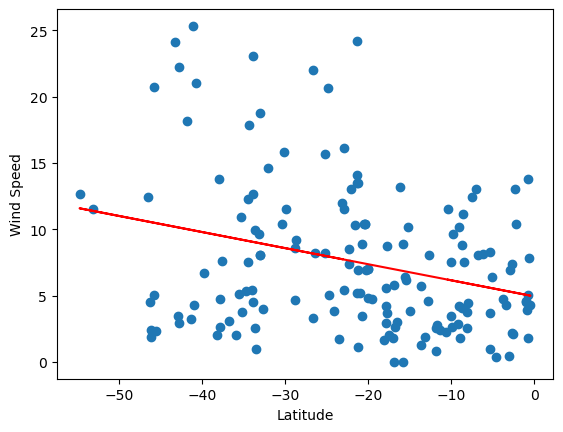

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))